## **Problem 3**

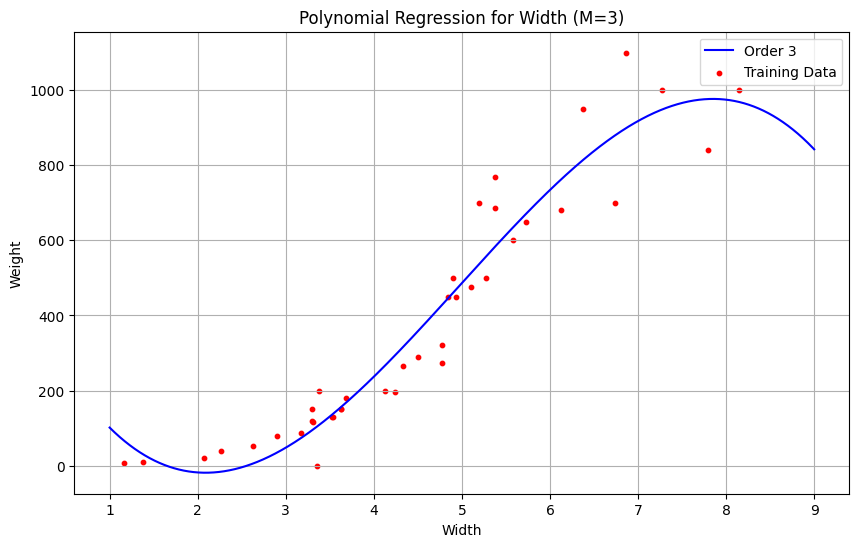

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Read in the training data
data = np.genfromtxt('FISHDTR.csv', delimiter=',', skip_header=1)
width = data[:, 0]
weight = data[:, 2]

# 2. Fit polynomial regression models
def fit_polynomial(x, y, M):
    # Create polynomial features
    X = np.column_stack([x**m for m in range(M+1)])

    # Compute the weights using the normal equation
    weights = np.linalg.inv(X.T @ X) @ X.T @ y

    return weights

coefficients = fit_polynomial(width, weight, 3)

# 3. Plot the estimated curve and training data
x_range = np.arange(1, 9.001, 0.001)
y_pred = sum([coefficients[m] * x_range**m for m in range(4)])

plt.figure(figsize=(10,6))
plt.plot(x_range, y_pred, label=f'Order {3}', color='blue')
plt.scatter(width, weight, color='red', s=10, label='Training Data')
plt.title('Polynomial Regression for Width (M=3)')
plt.xlabel('Width')
plt.ylabel('Weight')
plt.legend()
plt.grid(True)
plt.show()


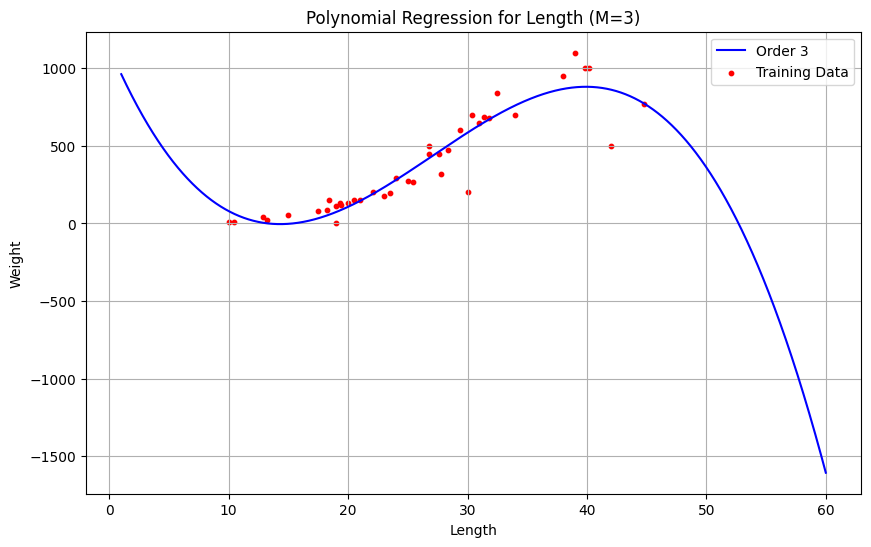

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Read in the training data (assuming you have already done it in the previous step)
length = data[:, 1]

# 2. Fit polynomial regression model
coefficients_length = fit_polynomial(length, weight, 3)

# 3. Plot the estimated curve and training data for "length"
x_range_length = np.arange(1, 60.001, 0.001)
y_pred_length = sum([coefficients_length[m] * x_range_length**m for m in range(4)])

plt.figure(figsize=(10,6))
plt.plot(x_range_length, y_pred_length, label=f'Order {3}', color='blue')
plt.scatter(length, weight, color='red', s=10, label='Training Data')
plt.title('Polynomial Regression for Length (M=3)')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.legend()
plt.grid(True)
plt.show()


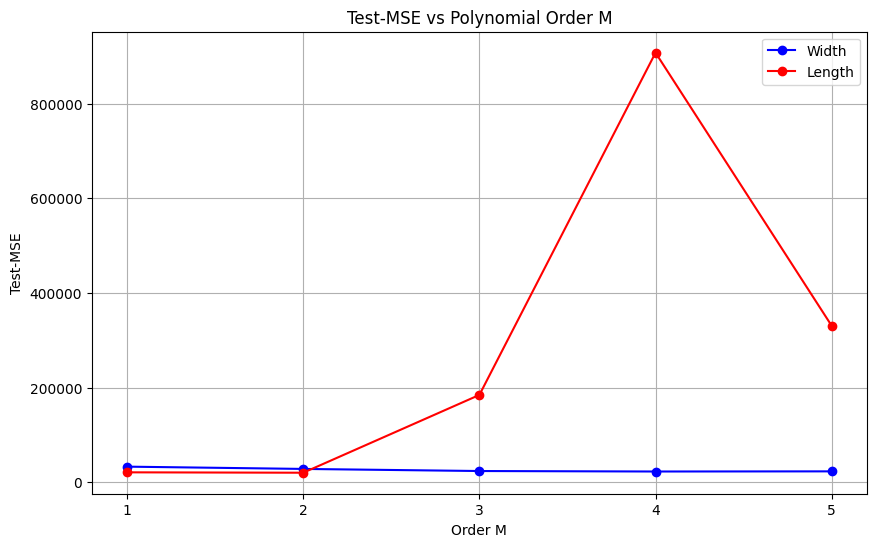

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define polynomial prediction function
def polynomial_predict(x, coefficients, M):
    return sum([coefficients[m] * x**m for m in range(M+1)])

# Compute mean squared error
def mse(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

# 1. Read in the testing data
test_data = np.genfromtxt('FISHDTE.csv', delimiter=',', skip_header=1)
width_test = test_data[:, 0]
length_test = test_data[:, 1]
weight_test = test_data[:, 2]

# 2. & 3. Fit models and compute test-MSE
orders = range(1, 6)
mse_width = []
mse_length = []

for M in orders:
    # For width
    coefficients_width = fit_polynomial(width, weight, M)
    y_pred_width = polynomial_predict(width_test, coefficients_width, M)
    mse_width.append(mse(weight_test, y_pred_width))

    # For length
    coefficients_length = fit_polynomial(length, weight, M)
    y_pred_length = polynomial_predict(length_test, coefficients_length, M)
    mse_length.append(mse(weight_test, y_pred_length))

# 4. Plot test-MSE against M
plt.figure(figsize=(10,6))
plt.plot(orders, mse_width, color='blue', marker='o', label='Width')
plt.plot(orders, mse_length, color='red', marker='o', label='Length')
plt.title('Test-MSE vs Polynomial Order M')
plt.xlabel('Order M')
plt.ylabel('Test-MSE')
plt.xticks(orders)
plt.legend()
plt.grid(True)
plt.show()
